In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import jit
from quantimpy import minkowski as mk
from mpl_toolkits.mplot3d import Axes3D

# Identifying the Normalization Constants



In [31]:
grid_dimensions = 300 #Number of grid points in each dimension
center = [grid_dimensions//2, grid_dimensions//2, grid_dimensions//2] #Center of the grid

radius = 75 #Radius of the sphere

In [32]:
volume_object = np.zeros((grid_dimensions, grid_dimensions, grid_dimensions), dtype=bool)
x, y, z = center
r = radius
# Create a grid of coordinates
coords = np.indices((grid_dimensions, grid_dimensions, grid_dimensions))

# Calculate the squared distance from the center (x, y, z)
squared_distances = (coords[0] - x) ** 2 + (coords[1] - y) ** 2 + (coords[2] - z) ** 2

# Create a mask where the squared distance is less than or equal to r^2
mask = squared_distances <= r ** 2

# Apply the mask to the volume array
volume_object[mask] = True

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Get the indices of the True values in the volume array
indices = np.where(volume_object)

# Plot the points
ax.scatter(indices[0], indices[1], indices[2], c='blue')

# Set the plot limits
ax.set_xlim(0, grid_dimensions)
ax.set_ylim(0, grid_dimensions)
ax.set_zlim(0, grid_dimensions)

# Set the labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

KeyboardInterrupt: 

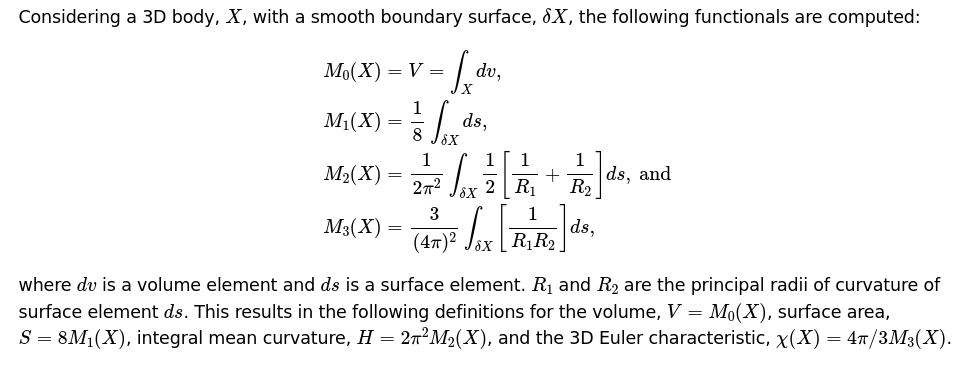

Solving the Integrals Provided in the Documentation gives me the following results:

$$M_0 = \frac 4 3 \pi r^3$$
$$M_1 = \frac 1 8 4 \pi r^2$$
$$M_2 = \frac {2 r}{\pi} $$

We expect the results calculated by the python library to correspond to these values.

Analytical Expressions taken are the following [2.5.1 of Dr Amit's Thesis]

$$V_0 = \frac 4 3 \pi r^3$$
$$V_1 = \frac 2 3 \pi r^2$$
$$V_2 = \frac 4 3 r$$

The normalization constants are the following:

$$N_0 = 1$$

$$N_1 = \frac 4 3$$

$$N_2 = \frac {2 \pi}{3}$$

Calculating to make sure these are the constants we get. 

Sphere of Radius 75 in a grid of 300x300x300

In [33]:
# Compute the Minkowski functionals for the volume
minkowski_functionals = mk.functionals(volume_object)
volume, surface_area, mean_curvature, euler_characteristic = minkowski_functionals

print("Volume:", volume)
print("Surface area:", surface_area)
print("Mean curvature:", mean_curvature)
print("Euler characteristic:", euler_characteristic)

Volume: 1767063.0
Surface area: 8832.960980210793
Mean curvature: 47.87881673621515
Euler characteristic: 0.238732414637843


In [34]:
# Solutions to the Solved Integrals. 

M_0 = 4/3*np.pi*radius**3
M_1 = 0.5 * np.pi * radius**2
M_2 = 2 * radius / np.pi 

print(M_0, M_1, M_2)

print(volume/M_0, surface_area/M_1, mean_curvature/M_2)

1767145.8676442585 8835.729338221294 47.7464829275686
0.9999531065059337 0.9996866859650708 1.0027715928071037


Close enough. The integrals were solved properly

In [35]:
# Calculate the volume
volume_analytical = (4/3) * np.pi * radius**3

# Calculate the surface area
surface_area_analytical = (2 * np.pi * radius**2) / 3

# Calculate the mean curvature
mean_curvature_analytical = 4 * radius / 3

print("Volume:", volume_analytical)
print("Surface area:", surface_area_analytical)
print("Mean curvature:", mean_curvature_analytical)

Volume: 1767145.8676442585
Surface area: 11780.972450961724
Mean curvature: 100.0


In [36]:
print("Normalization Constant for Volume:", volume_analytical/volume) 
print("Normalization Constant for Surface Area:", surface_area_analytical/surface_area)
print("Normalization Constant for Mean Curvature:", mean_curvature_analytical/mean_curvature) 

Normalization Constant for Volume: 1.0000468956931692
Normalization Constant for Surface Area: 1.3337512163085066
Normalization Constant for Mean Curvature: 2.0886063360952027


This closely Matches our expected values of 1, 4/3 and 2pi/3.

Just a sanity check with various radii, not just one, to ensure Truncation Errors arent' causing a mess.  

In [ ]:
def add_balls(center, radius):
    """
    Takes input of the center and radius, adds a ball at the specified center and radius, and returns the volume.

    Parameters:
    - center (tuple): The coordinates of the center of the ball in the form (x, y, z).
    - radius (float): The radius of the ball.

    Returns:
    - volume (ndarray): A 3D numpy array with dimensions (grid_dimensions, grid_dimensions, grid_dimensions).
                       The array represents a volume where everything is marked as False except for the positions
                       within the ball, which are marked as True.

    """
    
    volume = np.zeros((grid_dimensions, grid_dimensions, grid_dimensions), dtype=bool)
    x, y, z = center
    r = radius
    # Create a grid of coordinates
    coords = np.indices((grid_dimensions, grid_dimensions, grid_dimensions))
    
    # Calculate the squared distance from the center (x, y, z)
    squared_distances = (coords[0] - x) ** 2 + (coords[1] - y) ** 2 + (coords[2] - z) ** 2
    
    # Create a mask where the squared distance is less than or equal to r^2
    mask = squared_distances <= r ** 2
    
    # Apply the mask to the volume array
    volume[mask] = True
    return volume

def compute_minkowski_functionals(ball_radius):
    """
    Create a volume with balls and compute the Minkowski functionals.

    Parameters:
    - ball_radius: Radius of the balls to be added

    Returns:
    - Minkowski functionals computed for the volume
    """
    

    # Add balls to the volume
    volume = add_balls(center, ball_radius)
    
    # Compute the Minkowski functionals for the volume
    minkowski_functionals = mk.functionals(volume)

    return minkowski_functionals


In [ ]:
radii = [50 + 1*i for i in range(100)]
volume_ratios = []
surface_area_ratios = []
mean_curvature_ratios = []

for radius in tqdm(radii):
    #Calculating the Minkowski functionals
    volume_i, surface_area_i, mean_curvature_i, euler_characteristic_i = compute_minkowski_functionals(radius)

    # Calculate the volume
    volume_analytical = (4/3) * np.pi * radius**3

    # Calculate the surface area
    surface_area_analytical = (2 * np.pi * radius**2) / 3

    # Calculate the mean curvature
    mean_curvature_analytical = 4 * radius / 3

    #Calculating the ratios
    volume_ratios.append(volume_analytical/volume_i)
    surface_area_ratios.append(surface_area_analytical/surface_area_i)
    mean_curvature_ratios.append(mean_curvature_analytical/mean_curvature_i)
print("Done calculating the ratios")



100%|██████████| 100/100 [01:03<00:00,  1.57it/s]

Done calculating the ratios


In [ ]:
volume_ratios = np.asarray(volume_ratios)
surface_area_ratios = np.asarray(surface_area_ratios)
mean_curvature_ratios = np.asarray(mean_curvature_ratios)

print("Average Volume Ratio:", np.mean(volume_ratios))
print("Average Surface Area Ratio:", np.mean(surface_area_ratios))
print("Average Mean Curvature Ratio:", np.mean(mean_curvature_ratios))


Average Volume Ratio: 1.0001639568861314
Average Surface Area Ratio: 1.3338620556133909
Average Mean Curvature Ratio: 2.0913489776470016


In [ ]:
radii = [50 + 10*i for i in range(5)]
volume_ratios = []
surface_area_ratios = []
mean_curvature_ratios = []

for radius in radii:
    #Calculating the Minkowski functionals
    volume_i, surface_area_i, mean_curvature_i, euler_characteristic_i = compute_minkowski_functionals(radius)

    # Calculate the volume
    volume_analytical = (4/3) * np.pi * radius**3

    # Calculate the surface area
    surface_area_analytical = (2 * np.pi * radius**2) / 3

    # Calculate the mean curvature
    mean_curvature_analytical = 4 * radius / 3

    #Calculating the ratios
    volume_ratios.append(volume_analytical/volume_i)
    surface_area_ratios.append(surface_area_analytical/surface_area_i)
    mean_curvature_ratios.append(mean_curvature_analytical/mean_curvature_i)
    print(radius, volume_analytical/volume_i)




50 1.0005613850398885
60 1.0007628499338674
70 1.0002576191214279
80 1.0004756322773414
90 1.000003621701503


In [ ]:
print(3 / (4*np.pi))

0.238732414637843


Updated compute_minkowski_functionals

In [40]:

def compute_minkowski_functionals(ball_radius):
    """
    Create a volume with balls and compute the Minkowski functionals.

    Parameters:
    - ball_radius: Radius of the balls to be added

    Returns:
    - Minkowski functionals computed for the volume
    """
    

    # Add balls to the volume
    volume = add_balls(center, ball_radius)
    
    # Compute the Minkowski functionals for the volume
    minkowski_functionals = mk.functionals(volume)

    m0, m1, m2, m3 = minkowski_functionals
    v0 = m0 
    v1 = m1 * 4 / 3
    v2 = m2 * 2 * np.pi / 3
    v3 = m3 * 4 * np.pi / 3
    
    return v0, v1, v2, v3

def calculate_shapefinders(minkowski_functionals):
    """
    Calculates the shapefinders based on the given Minkowski functionals.
    Reference:
    - Section 2.5.1 of Dr Amit's thesis
    Parameters:
    - minkowski_functionals (list): A list of four Minkowski functionals [v_0, v_1, v_2, v_3].
    Returns:
    - thickness (float): The thickness shapefinder.
    - width (float): The width shapefinder.
    - length (float): The length shapefinder.
    """

    v_0, v_1, v_2, v_3 = minkowski_functionals

    l1 = v_0 / (2 * v_1)
    l2 = 2*v_1 / (np.pi * v_2)
    l3 = 3 * v_2 / (4 * v_3)

    # Sorting the shapefinders in descending order
    shapefinders = [l1, l2, l3]
    shapefinders.sort()
    thickness, width, length = shapefinders

    return thickness, width, length

def planarity(thickness, width):
    """
    Calculates the planarity of an object based on its thickness and width.
    Parameters:
    thickness (float): The thickness of the object.
    width (float): The width of the object.
    Returns:
    float: The planarity value, which is a measure of how flat the object is.
    Reference:
    - Section 2.5.1 of Dr Amit's thesis
    """

    p = (width - thickness) / (width + thickness)
    return p

def filamentarity(width, length):
    """
    Calculate the filamentarity of an object.

    Parameters:
    width (float): The width of the object.
    length (float): The length of the object.

    Returns:
    float: The filamentarity value of the object.
    """

    f = (length - width) / (length + width)
    return f

def add_balls(center, radius):
    """
    Takes input of the center and radius, adds a ball at the specified center and radius, and returns the volume.

    Parameters:
    - center (tuple): The coordinates of the center of the ball in the form (x, y, z).
    - radius (float): The radius of the ball.

    Returns:
    - volume (ndarray): A 3D numpy array with dimensions (grid_dimensions, grid_dimensions, grid_dimensions).
                       The array represents a volume where everything is marked as False except for the positions
                       within the ball, which are marked as True.

    """
    
    volume = np.zeros((grid_dimensions, grid_dimensions, grid_dimensions), dtype=bool)
    x, y, z = center
    r = radius
    # Create a grid of coordinates
    coords = np.indices((grid_dimensions, grid_dimensions, grid_dimensions))
    
    # Calculate the squared distance from the center (x, y, z)
    squared_distances = (coords[0] - x) ** 2 + (coords[1] - y) ** 2 + (coords[2] - z) ** 2
    
    # Create a mask where the squared distance is less than or equal to r^2
    mask = squared_distances <= r ** 2
    
    # Apply the mask to the volume array
    volume[mask] = True
    return volume


# Creating an Object to Visualize in HDF5 format

In [41]:
grid_dimensions = 300 #Number of grid points in each dimension
center = [grid_dimensions//2, grid_dimensions//2, grid_dimensions//2] #Center of the grid

radius = 75 #Radius of the sphere

volume_object = np.zeros((grid_dimensions, grid_dimensions, grid_dimensions), dtype=bool)
x, y, z = center
r = radius
# Create a grid of coordinates
coords = np.indices((grid_dimensions, grid_dimensions, grid_dimensions))

# Calculate the squared distance from the center (x, y, z)
squared_distances = (coords[0] - x) ** 2 + (coords[1] - y) ** 2 + (coords[2] - z) ** 2

# Create a mask where the squared distance is less than or equal to r^2
mask = squared_distances <= r ** 2

# Apply the mask to the volume array
volume_object[mask] = True



In [42]:
minkowski_functionals = compute_minkowski_functionals(radius)
thickness, width, length = calculate_shapefinders(minkowski_functionals)
p = planarity(thickness, width)
f = filamentarity(width, length)

print(p, f)

0.0016737937810872466 0.0012506445936936836


In [ ]:
import h5py

# Create a new HDF5 file
with h5py.File('volume_object.h5', 'w') as f:
    # Create a dataset to store the volume_object
    f.create_dataset('volume_object', data=volume_object)
